Demonstrate the Logistic Regression API. We will use text data to do a binary classification task.
1. Create Count Matrix
2. Build Logitic Regression Model
3. Apply Regularization
4. Do grid search to tune regularization terms

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir="E:\Work\Machine Learning Course\Python\Module 3 Logistic Regression\Data"
os.chdir(data_dir)

In [3]:
review_data=pd.read_table('movie_reviews.tsv',sep="\t")

In [4]:
review_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
review_data.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [6]:
review_data.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [7]:
review_data['sentiment'].describe()

count    25000.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: sentiment, dtype: float64

In [8]:
review_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


### Creating text features

<img src='dtm.png'>

In [9]:
## Creating Features
demo_text=["This is sentence one.", "This is sentence two.", "This is a very very long sentence three."]

In [10]:
import sklearn.feature_extraction.text as text

In [11]:
cv=text.CountVectorizer(demo_text)
count_matrix=cv.fit_transform(demo_text)
cv.get_feature_names()

['is', 'long', 'one', 'sentence', 'this', 'three', 'two', 'very']

In [12]:
count_matrix.toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 2]], dtype=int64)

In [13]:
pd.DataFrame(count_matrix.toarray(),columns=cv.get_feature_names())

,is,long,one,sentence,this,three,two,very
0,1,0,1,1,1,0,0,0
1,1,0,0,1,1,0,1,0
2,1,1,0,1,1,1,0,2


In [14]:
## Create Features for the linear classifier 
cv=text.CountVectorizer(review_data['review'].tolist(),max_features = 5000)
X=cv.fit_transform(review_data['review'])
X.shape

(25000, 5000)

In [15]:
y=review_data['sentiment']

In [16]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [17]:
import sklearn.linear_model as linear_model
clf=linear_model.LogisticRegression()

#### Logistic Regression API

<img src="api.png">

#### Regularization in sklearn API

Regularized Cost Function, l2 norm = $-\sum_{1}^{n} [y_i log(p_i)+(1-y_i)log(1-p_i)]+\frac{1}{C}\beta^2$, here $\frac{1}{C}=\lambda$

Regularized Cost Function, l1 norm = $-\sum_{1}^{n}[ y_i log(p_i)+(1-y_i)log(1-p_i)]+\frac{1}{C}|\beta|$, here $\frac{1}{C}=\alpha$

In [18]:
mod=clf.fit(X,y)

In [19]:
mod.predict_proba(X_test)

array([[  7.21147826e-01,   2.78852174e-01],
       [  9.99534628e-01,   4.65372187e-04],
       [  9.99998702e-01,   1.29761231e-06],
       ..., 
       [  6.09312312e-03,   9.93906877e-01],
       [  9.99969277e-01,   3.07225221e-05],
       [  9.99967427e-01,   3.25732120e-05]])

In [20]:
mod.classes_

array([0, 1], dtype=int64)

In [21]:
np.random.seed(300)
mod=model_selection.GridSearchCV(clf,param_grid={"penalty":["l1"],"C":np.random.uniform(0,120,2)})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1'], 'C': array([ 54.13471,  26.52268])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
mod.best_estimator_

LogisticRegression(C=26.522681005625447, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
mod.best_score_

0.83115000000000006

In [24]:
mod.predict_proba(X_test)

array([[  8.08644372e-01,   1.91355628e-01],
       [  1.00000000e+00,   1.32307548e-15],
       [  1.00000000e+00,   4.29206724e-28],
       ..., 
       [  7.36521955e-13,   1.00000000e+00],
       [  1.00000000e+00,   1.34377236e-23],
       [  1.00000000e+00,   1.36032561e-23]])

In [25]:
import sklearn.metrics as metrics

In [26]:
metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

(array([ 0.        ,  0.00872324,  0.00951626, ...,  0.99206979,
         0.99206979,  1.        ]),
 array([ 0.        ,  0.27683616,  0.28853914, ...,  0.99959645,
         1.        ,  1.        ]),
 array([  2.00000000e+000,   1.00000000e+000,   1.00000000e+000, ...,
          5.10581436e-061,   4.47031788e-061,   9.11374918e-100]))

In [27]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

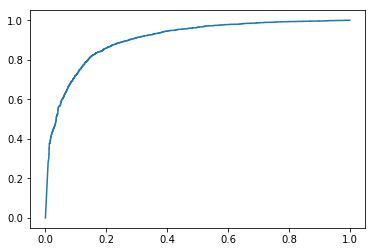

In [28]:
plt.plot(fpr,tpr,"-")

In [29]:
metrics.roc_auc_score(y_test,mod.predict_proba(X_test)[:,1])

0.90471294097014865

In [30]:
metrics.confusion_matrix(y_test,mod.predict(X_test))

array([[2109,  413],
       [ 420, 2058]], dtype=int64)

In [31]:
print(metrics.classification_report(y_test,mod.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.84      0.84      2522
          1       0.83      0.83      0.83      2478

avg / total       0.83      0.83      0.83      5000

